## Import Library

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

In [3]:
df = pd.read_csv('aerofit_treadmill.csv')

In [7]:
df.shape

(180, 9)

In [4]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


## Columns which include categorical values

In [13]:
df.describe(include='object').T
print(df.describe(include='object').T.index.tolist())

['Product', 'Gender', 'MaritalStatus']


In [15]:
df['Product'].value_counts(normalize=True)*100

KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: Product, dtype: float64

* The majority of customers prefer KP281, making it a strong performer in the market.
* KP781, while less popular, still captures a notable portion of the market.

In [16]:
df['Gender'].value_counts(normalize=True)*100

Male      57.777778
Female    42.222222
Name: Gender, dtype: float64

The dataset is slightly skewed towards males, suggesting that there are more male observations compared to females.

In [17]:
df['MaritalStatus'].value_counts(normalize=True)*100

Partnered    59.444444
Single       40.555556
Name: MaritalStatus, dtype: float64

The dataset is skewed towards partnered individuals, suggesting that there are more observations of partnered individuals compared to singles.


## Null value analysis

In [9]:
df.isnull().sum()/len(df)*100

Product          0.0
Age              0.0
Gender           0.0
Education        0.0
MaritalStatus    0.0
Usage            0.0
Fitness          0.0
Income           0.0
Miles            0.0
dtype: float64

This is good news as missing data can impact the accuracy and reliability of your analysis. A dataset without missing values allows for a more comprehensive and accurate exploration of the data.

<AxesSubplot:xlabel='Gender', ylabel='Age'>

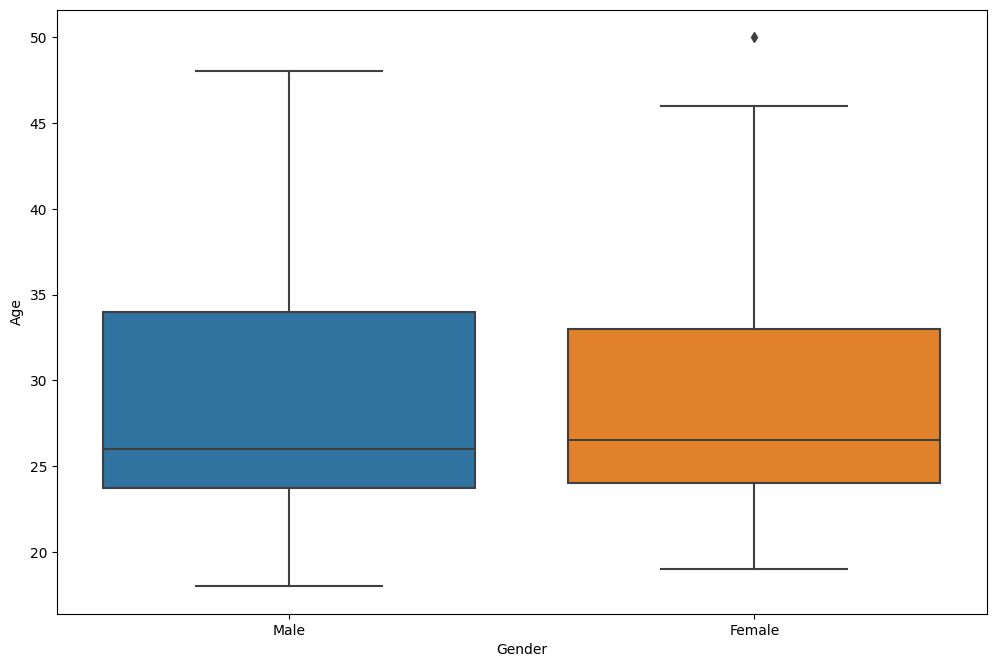

In [31]:
sns.boxplot(data=df, y='Age', x='Gender')

<AxesSubplot:xlabel='Gender', ylabel='Age'>

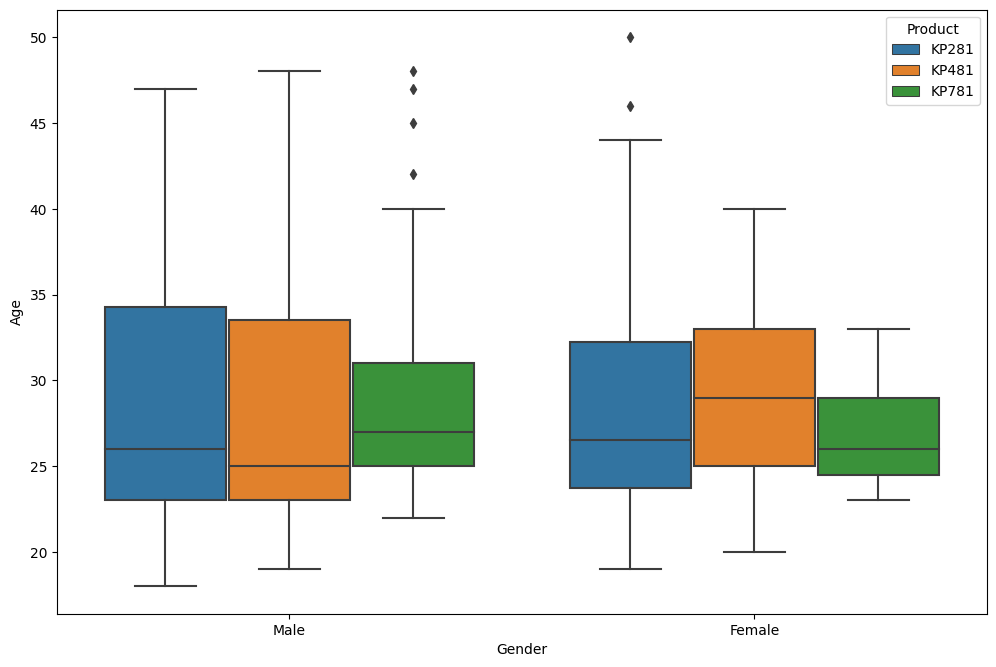

In [27]:
sns.boxplot(data=df, y='Age', x='Gender', hue = 'Product')

<AxesSubplot:xlabel='MaritalStatus', ylabel='Age'>

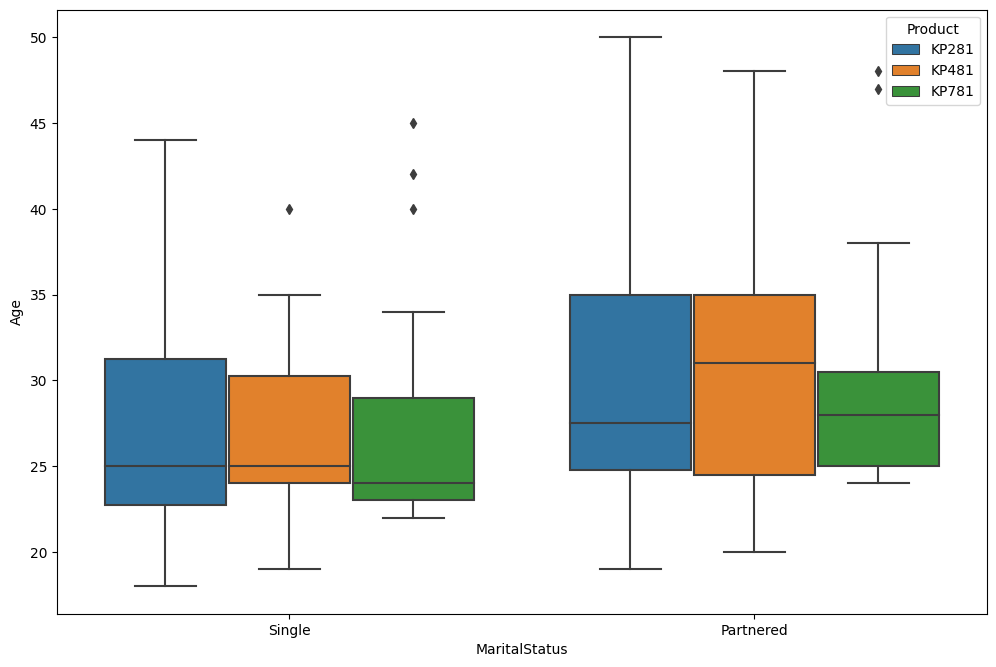

In [29]:
sns.boxplot(data=df, y='Age', x='MaritalStatus', hue = 'Product')

In [ ]:
## 

<AxesSubplot:xlabel='Gender', ylabel='Usage'>

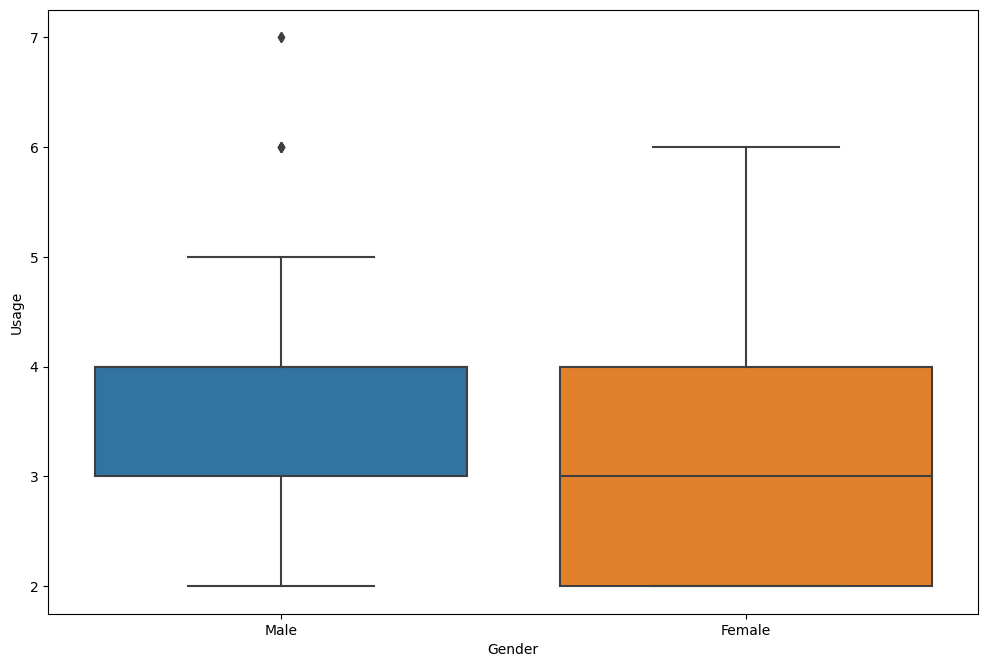

In [32]:
sns.boxplot(data=df, y='Usage', x='Gender')

#### boxplot Gender vs Usage Shows that Female are using is higher as compared to Malem

<AxesSubplot:xlabel='Gender', ylabel='Usage'>

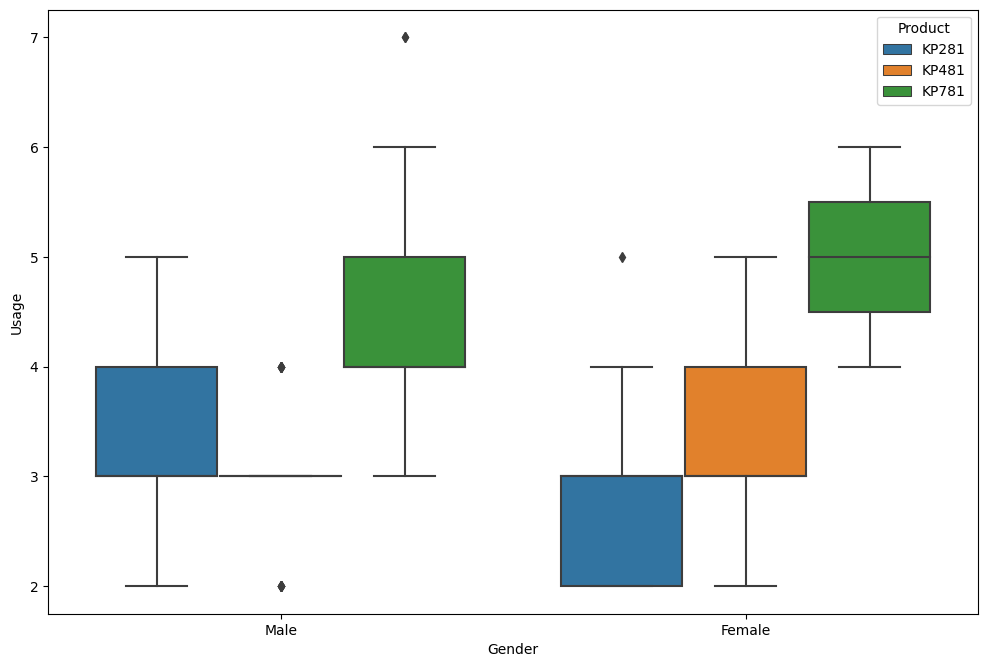

In [33]:
sns.boxplot(data=df, y='Usage', x='Gender', hue='Product')

#### boxplot Gender vs Usage Shows that Female are using is higher and most used product is KP781

<AxesSubplot:xlabel='MaritalStatus', ylabel='Usage'>

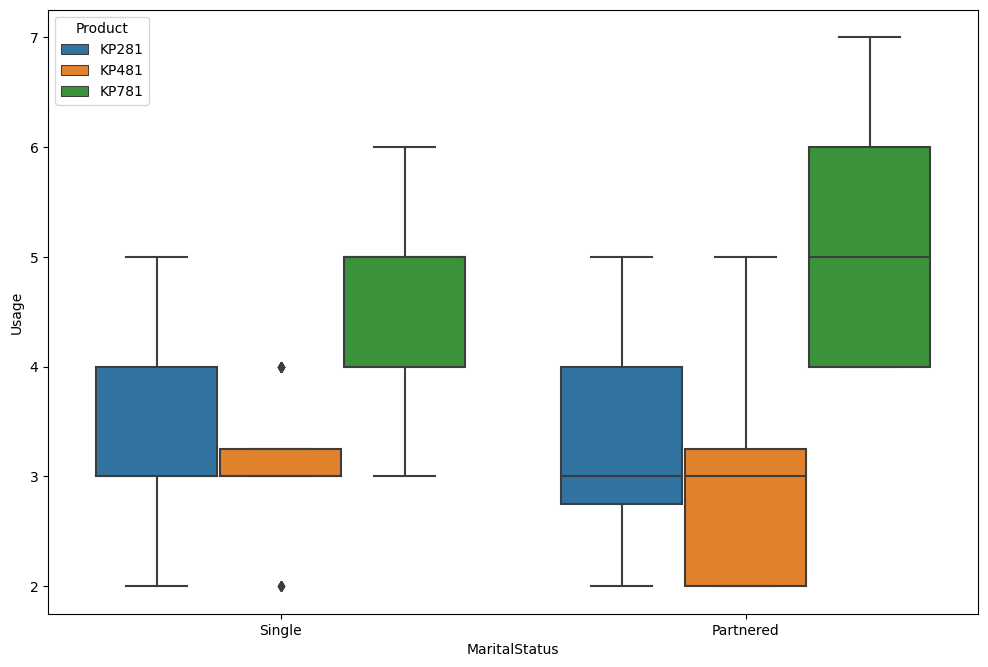

In [34]:
sns.boxplot(data=df, y='Usage', x='MaritalStatus', hue = 'Product')

#### boxplot MaritalStatus vs Usage Shows that partnered people are using is higher and most used product is KP781

<AxesSubplot:xlabel='Gender', ylabel='count'>

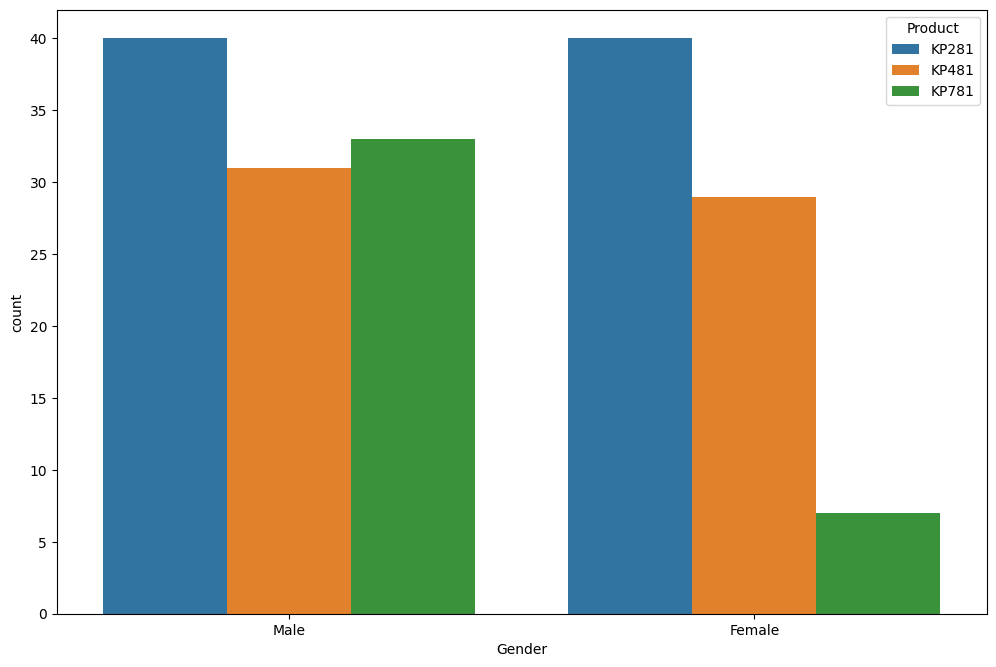

In [36]:
sns.countplot(data = df, x='Gender', hue='Product')

#### countplot Male vs Female plot show that Male count is higher in all product compair to Female

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

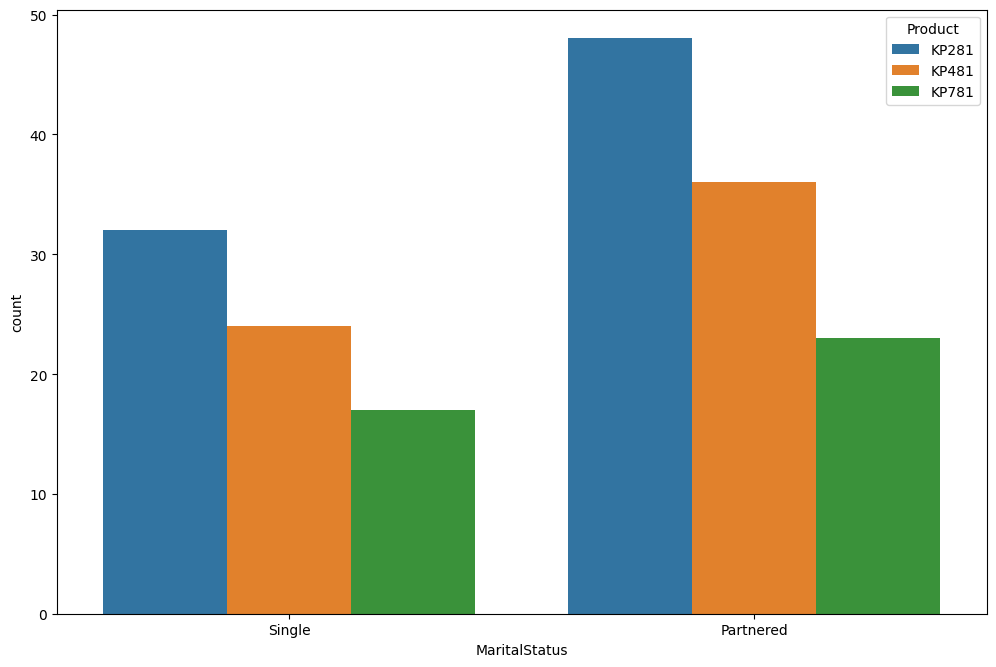

In [38]:
sns.countplot(data = df, x='MaritalStatus', hue='Product')

#### countplot Single vs Partnered plot show that Partnered count is higher in all individual product compair to Single

<AxesSubplot:xlabel='Age', ylabel='Count'>

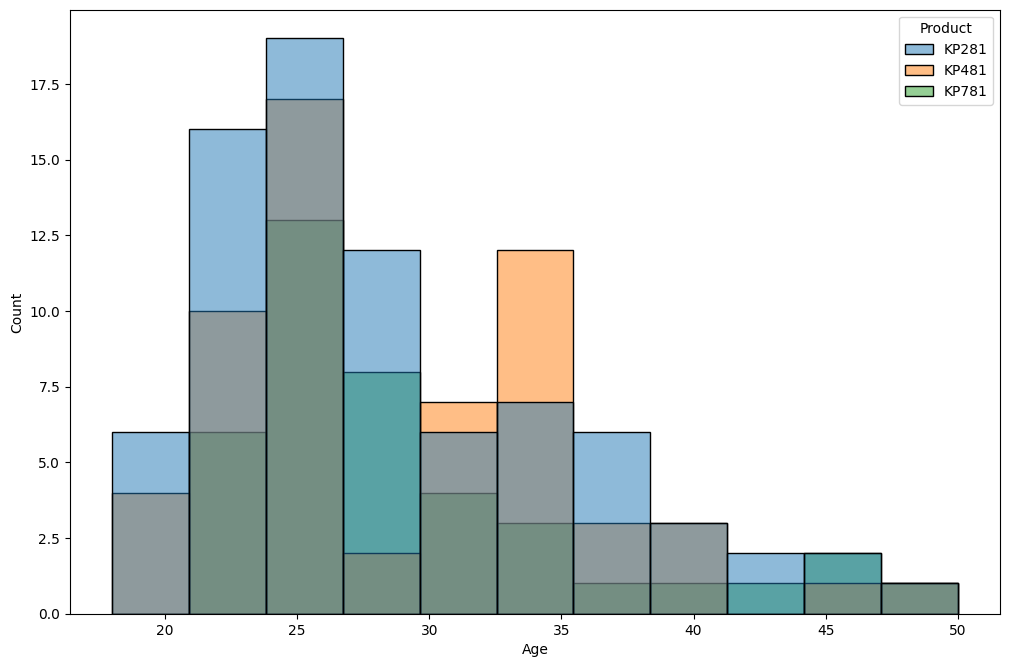

In [47]:
sns.histplot(data=df, x='Age', hue='Product')

#### histplot count distribution along with age range and product

<AxesSubplot:xlabel='Usage', ylabel='Count'>

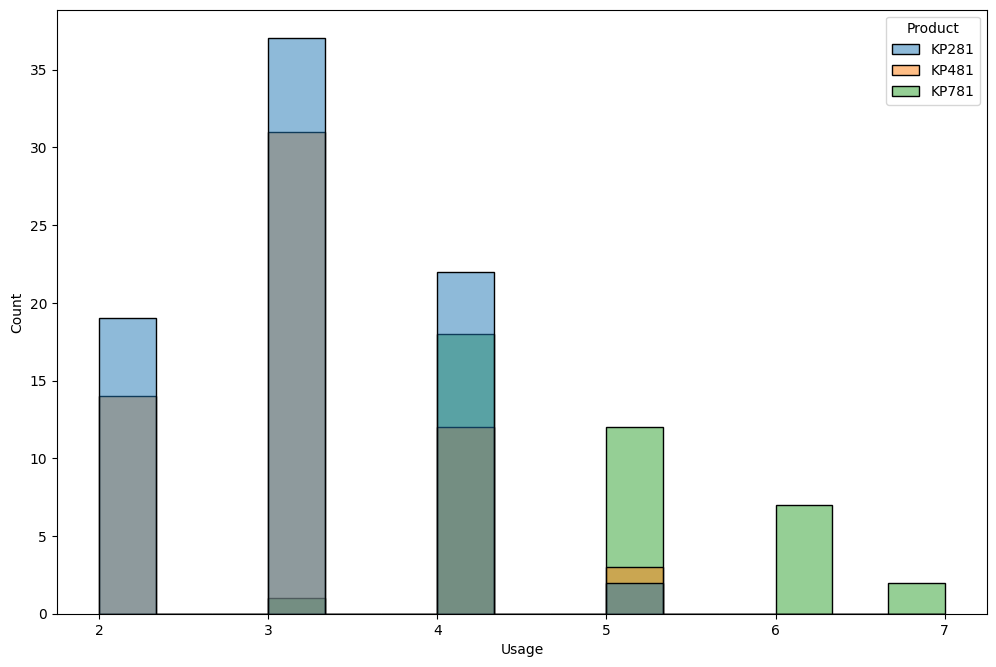

In [132]:
sns.histplot(data=df, x='Usage', hue='Product')

#### histplot count distribution along with Usage and product

<AxesSubplot:xlabel='Age', ylabel='Count'>

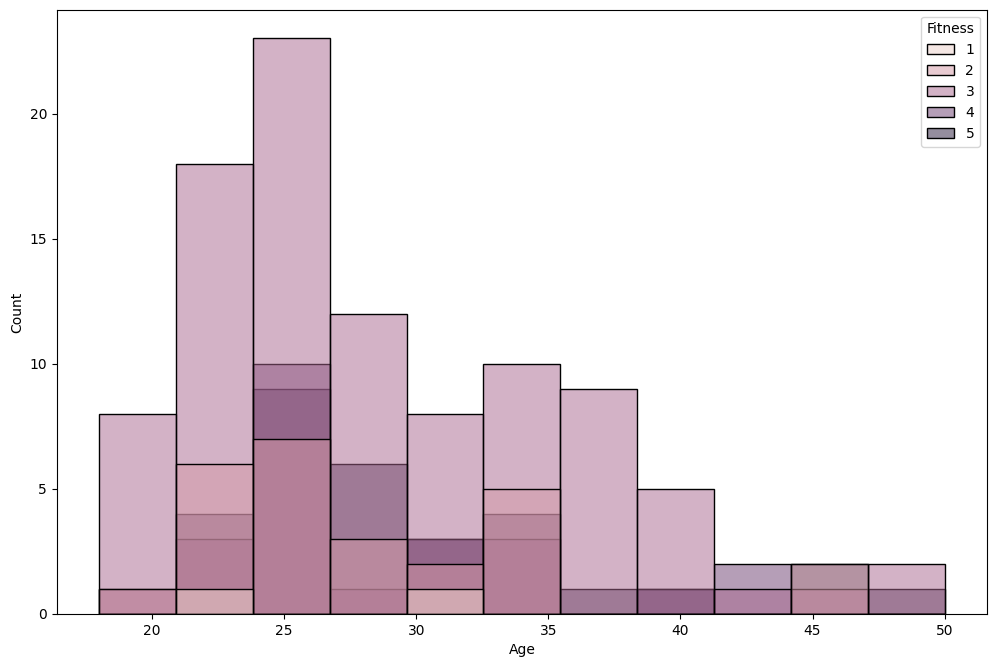

In [154]:
sns.histplot(data=df, x='Age', hue='Fitness', color=sns.color_palette("bright", 5))

#### histplot count distribution along with Age and Fitness gred?

<AxesSubplot:xlabel='Miles', ylabel='Count'>

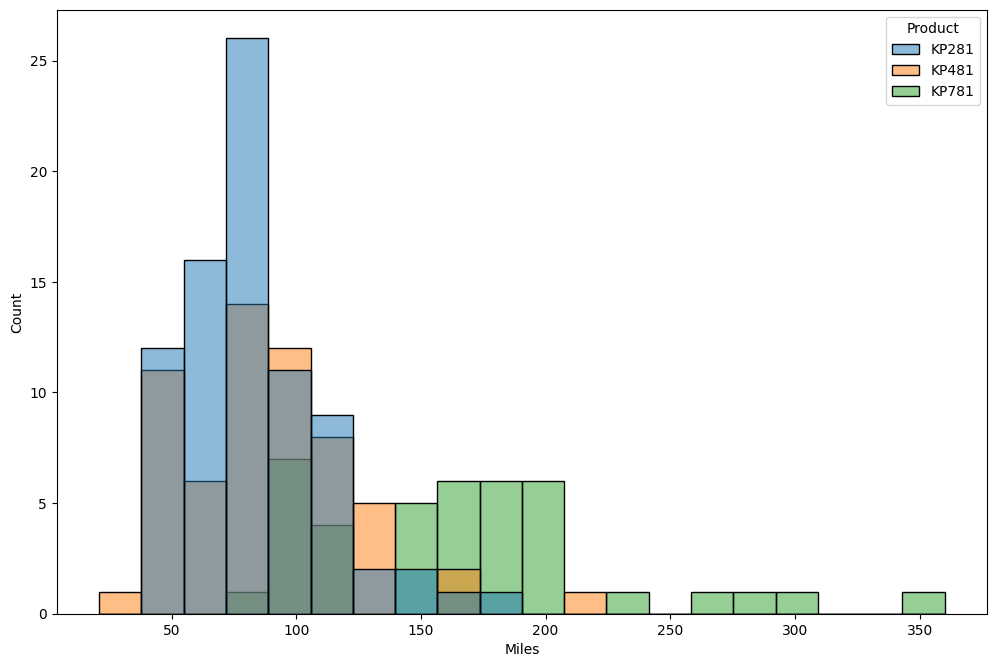

In [155]:
sns.histplot(data=df, x='Miles', hue='Product')

#### histplot count distribution along with Miles and Product

<AxesSubplot:>

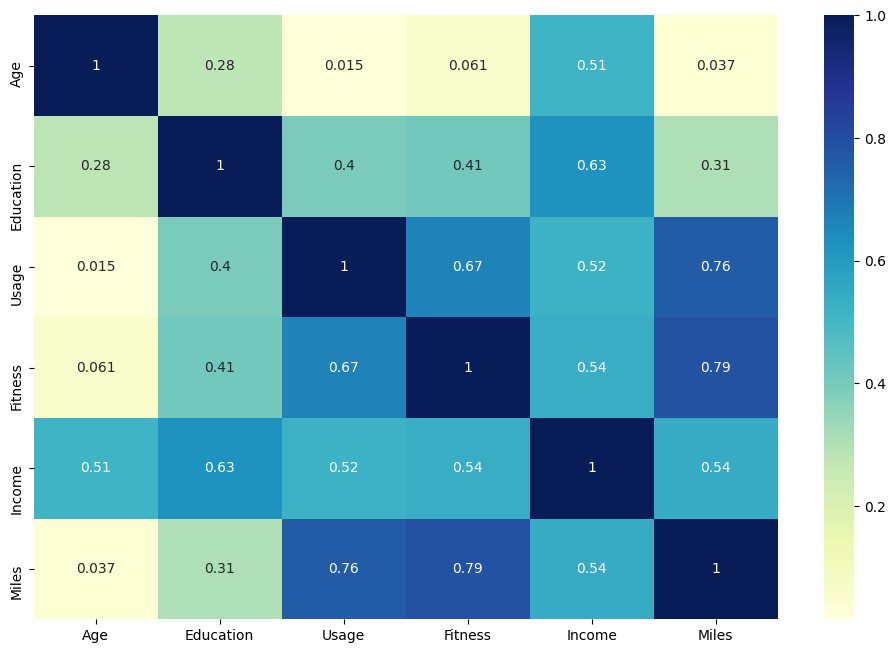

In [50]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)  

#### HeatMap of correlation with all of the other variables

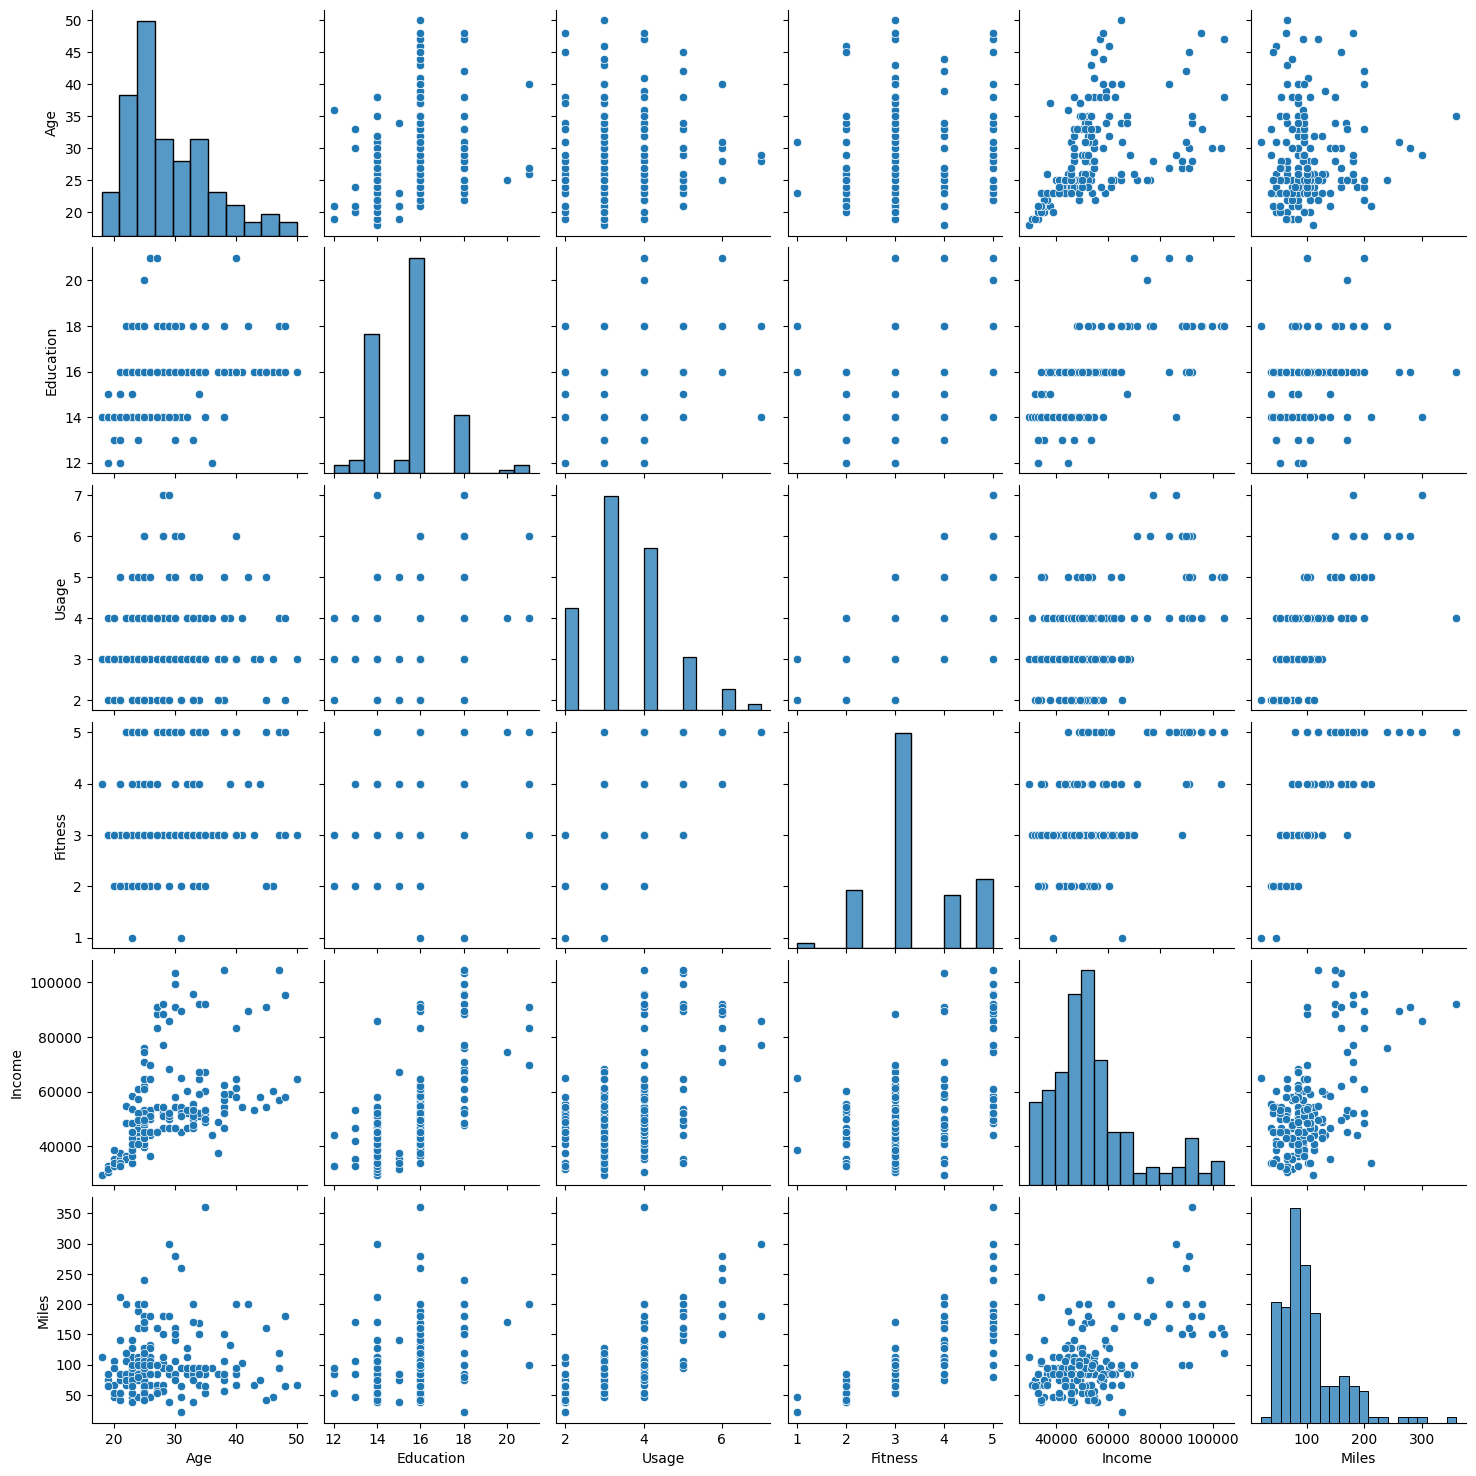

In [51]:
sns.pairplot(df)

## Outlier

Detect Outliers Using the Interquartile Range (IQR)
<br>
In statistics, interquartile range or IQR is a quantity that measures the difference between the first and the third quartiles in a given dataset.

The first quartile is also called the one-fourth quartile, or the 25% quartile.
<br>
If q25 is the first quartile, it means 25% of the points in the dataset have values less than q25.
<br>
The third quartile is also called the three-fourth, or the 75% quartile.
<br>
If q75 is the three-fourth quartile, 75% of the points have values less than q75.
<br>
Using the above notations, 
<br>
IQR = q75 - q25.

[Text(0.5, 1.0, 'Box Plot of Scores')]

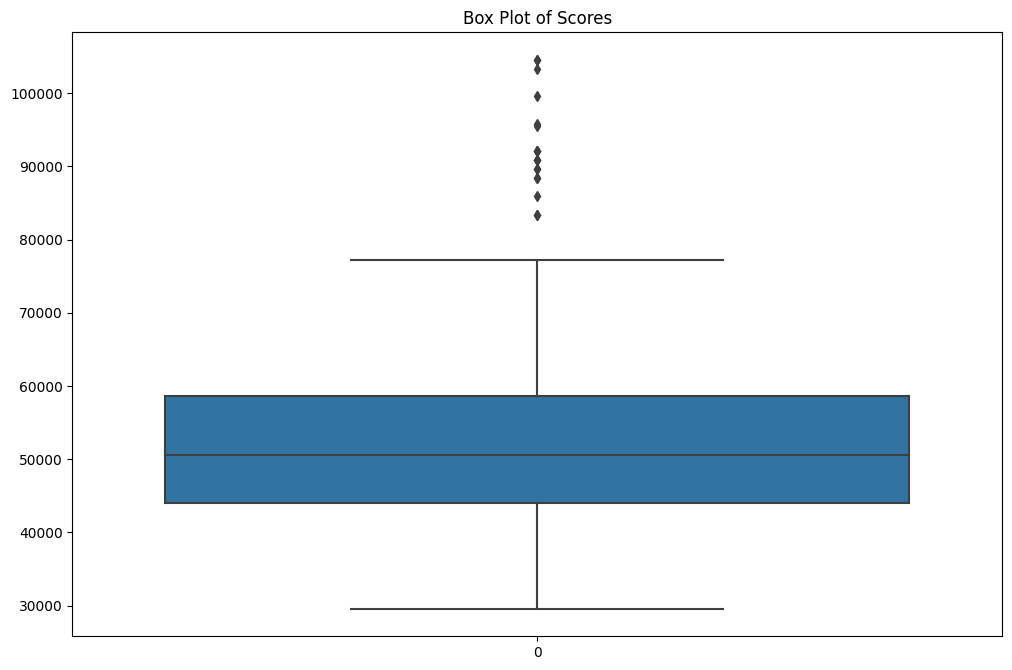

In [54]:
sns.boxplot(data=df['Income']).set(title="Box Plot of Scores")

In [90]:
# df.Income.describe?

In [131]:
def outlier_using_IQR(df, columns='Income'):
    
    # q75 = df.Income.quantile(0.75)
    # q25 = df.Income.quantile(0.25)
    q25,q75 = np.percentile(a = df[columns], q=[25,75])
    
    IQR = q75-q25
    print(IQR)
    upper_limit = q75 + 1.5*IQR
    lower_limit = q25 - 1.5*IQR
    print(upper_limit, lower_limit)
    
    df_scores_filtered = df[(df[columns]>lower_limit) & (df[columns]<upper_limit)]
    return df_scores_filtered

In [129]:
df.shape

(180, 9)

As a next step, filter the dataframe to retain records that lie in the permissible range.

## Outlier for Income

In [162]:
Income_outliers = outlier_using_IQR(df, columns='Income')
Income_outliers

14609.25
80581.875 22144.875


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
156,KP781,25,Male,20,Partnered,4,5,74701,170
157,KP781,26,Female,21,Single,4,3,69721,100
158,KP781,26,Male,16,Partnered,5,4,64741,180
163,KP781,28,Male,18,Partnered,7,5,77191,180


In [164]:
print(f"As seen in the output, this method labels {len(df)-len(Income_outliers)} points as outliers, and the filtered dataframe is {len(Income_outliers)} records long.")

As seen in the output, this method labels 19 points as outliers, and the filtered dataframe is 161 records long.


## Outlier for Age

In [166]:
Age_outliers = outlier_using_IQR(df, columns='Age')
Age_outliers

9.0
46.5 10.5


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
173,KP781,35,Male,16,Partnered,4,5,92131,360
174,KP781,38,Male,18,Partnered,5,5,104581,150
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200


In [167]:
print(f"As seen in the output, this method labels {len(df)-len(Age_outliers)} points as outliers, and the filtered dataframe is {len(Age_outliers)} records long.")

As seen in the output, this method labels 5 points as outliers, and the filtered dataframe is 175 records long.


## Outlier for Usage

In [168]:
Usage_outliers = outlier_using_IQR(df, columns='Usage')
Usage_outliers

1.0
5.5 1.5


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
174,KP781,38,Male,18,Partnered,5,5,104581,150
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [169]:
print(f"As seen in the output, this method labels {len(df)-len(Usage_outliers)} points as outliers, and the filtered dataframe is {len(Usage_outliers)} records long.")

As seen in the output, this method labels 9 points as outliers, and the filtered dataframe is 171 records long.


## Outlier for Miles

In [170]:
Miles_outliers = outlier_using_IQR(df, columns='Miles')
Miles_outliers

48.75
187.875 -7.125


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
172,KP781,34,Male,16,Single,5,5,92131,150
174,KP781,38,Male,18,Partnered,5,5,104581,150
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [171]:
print(f"As seen in the output, this method labels {len(df)-len(Miles_outliers)} points as outliers, and the filtered dataframe is {len(Miles_outliers)} records long.")

As seen in the output, this method labels 13 points as outliers, and the filtered dataframe is 167 records long.


In [172]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


# Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table (can use pandas.crosstab here)

In [174]:
pd.crosstab(df.Product, [df.MaritalStatus, df.Gender], rownames=['Product'], colnames=['MaritalStatus', 'Gender']) 

MaritalStatus Partnered      Single     
Gender           Female Male Female Male
Product                                 
KP281                27   21     13   19
KP481                15   21     14   10
KP781                 4   19      3   14

The KP281 is an entry-level treadmill that sells for $1,500.
<br>

The KP481 is for mid-level runners that sell for $1,750.
<br>

The KP781 treadmill is having advanced features that sell for $2,500.

The table represents the count of individuals based on their MaritalStatus, Gender, and the specific Product (KP281, KP481, KP781) purchased. Let's derive some insights:

* Overall Purchase Distribution:<br>
KP281: The highest number of purchases is from partnered females, followed by single males.
KP481: Partnerships seem to have a more balanced distribution, with a slightly higher count of purchases from single males.
KP781: Again, partnered females lead in purchases, followed by single males.

* Marital Status Influence:<br>
For all products, partnered individuals, especially females, show a higher count of purchases compared to their single counterparts.
This suggests that the marital status might play a role in the decision to purchase a treadmill, with partnered individuals being more likely to make a purchase.
* Gender Influence:<br>
Across all products, females, whether partnered or single, tend to have a higher count of purchases compared to males.
This indicates that females are more likely to buy Aerofit treadmills than males.
* Product Preference:<br>
KP281 is the most popular product across all categories of MaritalStatus and Gender.
KP781 is the least purchased, but partnered females show a higher preference for it compared to other groups.
Single Males vs. Single Females:

Single males have a higher count of purchases for KP281 and KP781, suggesting that these products might cater more to this demographic.
Partnered Males vs. Partnered Females:

Partnered females show a consistently higher count of purchases for all products, indicating a potential market preference among this group.
Key Takeaways:

The marketing strategy for KP281 seems to be effective, as it attracts the highest number of purchases across all demographics.
Partnered females are a notable customer segment, showing a strong preference for all products.
There might be untapped potential among single males, especially for KP281 and KP781.
These insights can guide marketing and sales strategies, helping to tailor promotions or advertising efforts based on the observed preferences and trends within different demographic groups.